<a href="https://colab.research.google.com/github/msabdulrazak/Datasets/blob/main/Experiment1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 1

In [ ]:
!pip install gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Loading the pre-trained model (Word2Vec)

In [ ]:
print("Loading word vectors...")
word_vectors = api.load("word2vec-google-news-300")
print("Word vectors loaded successfully!")

Loading word vectors...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word vectors loaded successfully!


In [ ]:
word = "king"
vector = word_vectors[word]
print(f"Vector representation of '{word}':\n", vector[:10])

Vector representation of 'king':
 [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


Explore Different Word Relationships

In [ ]:
def explore_relationship(word1, word2, word3, expected_result):
    """
    Performs the word vector arithmetic: word1 - word2 + word3 and finds the closest word.
    """
    result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]
    most_similar = word_vectors.most_similar([result_vector], topn=5)

    print(f"Relationship: {word1} - {word2} + {word3} ≈ {expected_result}\n")
    for word, similarity in most_similar:
        print(f"{word}: {similarity:.4f}")
    print("\n" + "-"*50 + "\n")

# 1. Gender Relationship: King - Man + Woman ≈ Queen
explore_relationship("king", "man", "woman", "queen")

# 2. Country-Capital Relationship: Paris - France + Germany ≈ Berlin
explore_relationship("paris", "france", "germany", "berlin")

# 3. Object-Profession Relationship: Doctor - Hospital + School ≈ Teacher
explore_relationship("doctor", "hospital", "school", "teacher")

# 4. Comparative Adjective: Big - Small + Fast ≈ Slow
explore_relationship("big", "small", "fast", "slow")

# 5. Plural Form Relationship: Dog - Puppy + Kittens ≈ Cats
explore_relationship("dog", "puppy", "kittens", "cats")


Relationship: king - man + woman ≈ queen

king: 0.8449
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819

--------------------------------------------------

Relationship: paris - france + germany ≈ berlin

paris: 0.7316
germany: 0.6952
berlin: 0.4838
german: 0.4695
lindsay_lohan: 0.4536

--------------------------------------------------

Relationship: doctor - hospital + school ≈ teacher

school: 0.5948
guidance_counselor: 0.5739
teacher: 0.5410
doctor: 0.5294
schooler: 0.4876

--------------------------------------------------

Relationship: big - small + fast ≈ slow

fast: 0.7642
big: 0.5077
quick: 0.5063
quicker: 0.4440
faster: 0.4306

--------------------------------------------------

Relationship: dog - puppy + kittens ≈ cats

kittens: 0.8317
cats: 0.7649
dogs: 0.7273
felines: 0.6653
dog: 0.6557

--------------------------------------------------



Arithmetic Operations - Addition

In [ ]:
result_vector = word_vectors["king"] + word_vectors["queen"]
most_similar = word_vectors.most_similar([result_vector], topn=5)
print("King + Queen ≈ ?", most_similar)


King + Queen ≈ ? [('queen', 0.9126338362693787), ('king', 0.904472827911377), ('monarch', 0.704138457775116), ('kings', 0.6757685542106628), ('princess', 0.6753551363945007)]


Subtraction

In [ ]:
result_vector = word_vectors["paris"] - word_vectors["france"]
most_similar = word_vectors.most_similar([result_vector], topn=5)
print("Paris - France ≈ ?", most_similar)


Paris - France ≈ ? [('paris', 0.44150933623313904), ('plaster', 0.2880156934261322), ('Floridan', 0.28085052967071533), ('feigned_martyrdom', 0.27694064378738403), ('microderm_abrasion', 0.26404598355293274)]


Multiplication

In [ ]:
result_vector = word_vectors["happy"] * 2
most_similar = word_vectors.most_similar([result_vector], topn=5)
print("Happy * 2 ≈ ?", most_similar)


Happy * 2 ≈ ? [('happy', 1.0), ('glad', 0.7408890724182129), ('pleased', 0.6632170677185059), ('ecstatic', 0.6626912355422974), ('overjoyed', 0.6599286794662476)]


Division/Average

In [ ]:
result_vector = (word_vectors["king"] + word_vectors["queen"]) / 2
most_similar = word_vectors.most_similar([result_vector], topn=5)
print("(King + Queen) / 2 ≈ ?", most_similar)


(King + Queen) / 2 ≈ ? [('queen', 0.9126338362693787), ('king', 0.904472827911377), ('monarch', 0.704138457775116), ('kings', 0.6757685542106628), ('princess', 0.6753551363945007)]


Cosine Similarity

In [ ]:
word1, word2 = "king", "queen"
similarity = word_vectors.similarity(word1, word2)
print(f"Cosine similarity between '{word1}' and '{word2}':", similarity)

Cosine similarity between 'king' and 'queen': 0.6510957


Experiment 2 - Visualization of Q1 and Tech words

PCA

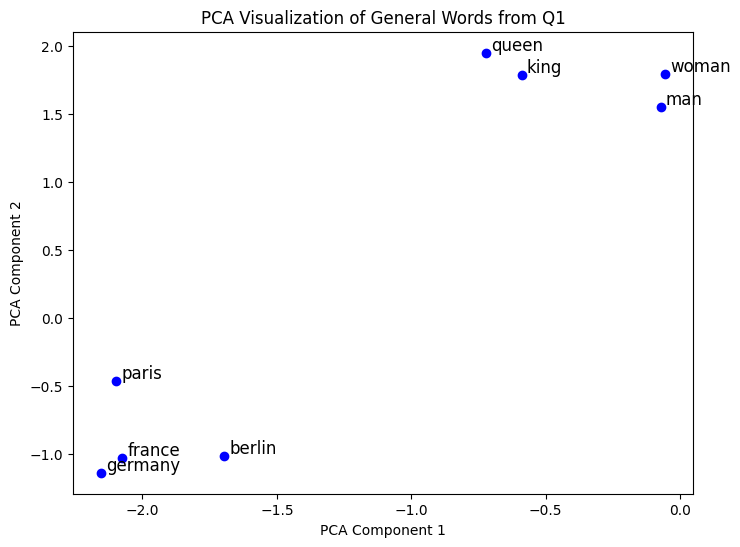

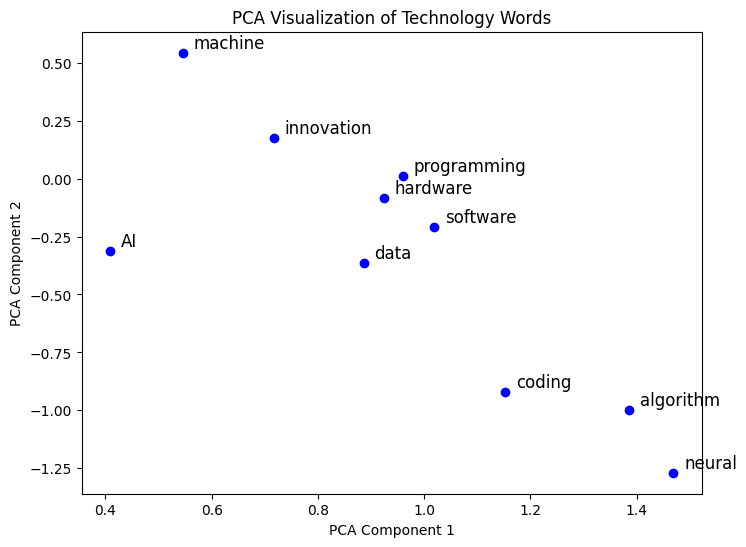

In [ ]:
general_words = ["king", "queen", "man", "woman", "paris", "france", "germany", "berlin",
                 "AI", "machine", "data", "algorithm", "neural", "coding",
                 "programming", "software", "hardware", "innovation"]

valid_general_words = [word for word in general_words if word in word_vectors]

word_vecs = np.array([word_vectors[word] for word in valid_general_words])

pca = PCA(n_components=2)
pca.fit(word_vecs)

def plot_words(words, title="PCA Visualization"):
    filtered_words = [word for word in words if word in word_vectors]

    if not filtered_words:
        raise ValueError("None of the selected words are in the vocabulary!")

    reduced_vecs = pca.transform(np.array([word_vectors[word] for word in filtered_words]))

    plt.figure(figsize=(8, 6))
    for word, (x, y) in zip(filtered_words, reduced_vecs):
        plt.scatter(x, y, color='blue', marker='o')
        plt.text(x + 0.02, y + 0.02, word, fontsize=12)

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_words(["king", "queen", "man", "woman", "paris", "france", "germany", "berlin"],
           "PCA Visualization of General Words from Q1")

plot_words(["AI", "machine", "data", "algorithm", "neural", "coding",
            "programming", "software", "hardware", "innovation"],
           "PCA Visualization of Technology Words")

Visualization using t-SNE

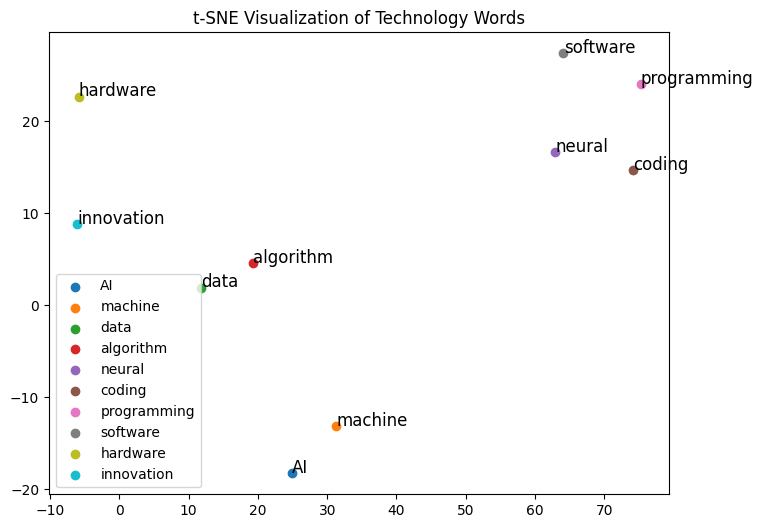

In [ ]:
tech_words=["AI", "machine", "data", "algorithm", "neural", "coding",
            "programming", "software", "hardware", "innovation"]

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_vecs = tsne.fit_transform(word_vecs)

plt.figure(figsize=(8, 6))
for word, (x, y) in zip(tech_words, tsne_vecs):
    plt.scatter(x, y, label=word)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("t-SNE Visualization of Technology Words")
plt.legend()
plt.show()


Generate Similar Words

In [ ]:
def get_similar_words(word, top_n=5):
    try:
        similar_words = word_vectors.most_similar(word, topn=top_n)
        return [w[0] for w in similar_words]
    except KeyError:
        return ["Word not found in vocabulary"]

input_word = "tennis"
similar_words = get_similar_words(input_word)
print(f"Top {len(similar_words)} words similar to '{input_word}': {similar_words}")


Top 5 words similar to 'tennis': ['Tennis', 'volleyball', 'badminton', 'basketball', 'soccer']


In [ ]:
def get_similar_words(word1, word2, top_n=5):
    """Fetches semantically similar words for two input words using Word2Vec embeddings."""
    def fetch_similar(word):
        try:
            return [w[0] for w in word_vectors.most_similar(word, topn=top_n)]
        except KeyError:
            return ["Word not found in vocabulary"]

    similar_words_1 = fetch_similar(word1)
    similar_words_2 = fetch_similar(word2)

    return similar_words_1, similar_words_2

word1 = input("Enter first word: ")
word2 = input("Enter second word: ")

similar_words_1, similar_words_2 = get_similar_words(word1, word2)

print(f"\nTop {len(similar_words_1)} words similar to '{word1}': {similar_words_1}")
print(f"Top {len(similar_words_2)} words similar to '{word2}': {similar_words_2}")


Enter first word: Country
Enter second word: Nation

Top 5 words similar to 'Country': ['Forever_Pr', 'singer_Hal_Ketchum', 'singer_Radney_Foster', 'singer_Rhett_Akins', 'singer_Gabbie_Nolen']
Top 5 words similar to 'Nation': ['Sakimay_First', 'Tribes', 'Movies_Birth', 'Chapleau_Cree_First', 'Bloodvein_First']
